# European Tour Destinations Dataset


## 1. Introducao

- Nesta analise foram explorados diversos dados relacionados a destinos turisticos ao redor da europa. Com o objetivo de identificar tendencias e insights sobre paises,comidas,religiao,moeda local, entre outras areas. Os dados foram retirados de um dataset proveniente do site KAGGLE.

## 2. Carregamento e Preparação dos Dados

### 2.1. Importacao das bibloiotecas 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Carregamento dos dados

In [3]:
df = pd.read_excel(r'/Users/christophe/Downloads/destinations.xlsx') #Substitua pelo seu local de arquivo
print(df.head()) 
print(len(df))  

  Destination    Region Country Category   Latitude  Longitude  \
0        Rome     Lazio   Italy     City  41.902782  12.496366   
1    Florence   Tuscany   Italy     City  43.769581  11.255772   
2      Venice    Veneto   Italy     City  45.435559  12.336196   
3       Milan  Lombardy   Italy     City  45.464643   9.188540   
4      Naples  Campania   Italy     City  40.851330  14.254720   

  Approximate Annual Tourists Currency Majority Religion  \
0                  14 million     Euro    Roman Catholic   
1                  10 million     Euro    Roman Catholic   
2                  10 million     Euro    Roman Catholic   
3                   7 million     Euro    Roman Catholic   
4                   5 million     Euro    Roman Catholic   

                   Famous Foods Language  \
0          Pizza, Pasta, Gelato  Italian   
1          Pizza, Pasta, Gelato  Italian   
2          Pizza, Pasta, Gelato  Italian   
3  Risotto, Ossobuco, Panettone  Italian   
4         Pizza, Pasta

- O dataframe possui 39 colunas com 1013 linhas

In [4]:
df.describe()

,Latitude,Longitude
count,209.000000,209.000000
mean,48.381503,12.397526
std,8.203389,20.545257
min,32.652843,-22.189722
25%,43.257158,4.886067
50%,47.557778,9.741326
75%,53.480958,18.955689
max,69.649328,158.624312


In [5]:
perct_missing_values = df.isnull().sum()*100 / len(df)
perct_missing_values.sort_values()

Destination                     0.000000
Region                          0.000000
Country                         0.000000
Category                        0.000000
Latitude                        0.000000
Longitude                       0.000000
Approximate Annual Tourists     0.000000
Currency                        0.000000
Majority Religion               0.000000
Famous Foods                    0.000000
Language                        0.000000
Best Time to Visit              0.000000
Cost of Living                  0.000000
Safety                          0.000000
Cultural Significance           0.000000
Description                    23.923445
dtype: float64

In [6]:
print(df.info())

df = df.drop_duplicates() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

**Observação:**
- Os dados foram carregados do arquivo `destinations.xlsx`.
- Duplicatas foram removidas para garantir a qualidade dos dados.

## 3. Analise Social

### 3.1. Analise do Nivel de seguranca por pais

Contagem de Níveis de Segurança:
Safety Level
Alta segurança     171
Média segurança     37
Baixa segurança      1
Name: count, dtype: int64

Países com mais destinos altamente seguros:
Country
Austria           10
Sweden            10
Norway            10
Monaco            10
Denmark           10
Malta             10
Iceland           10
Switzerland       10
Belgium            9
Luxembourg         9
Greece             9
Germany            9
Portugal           9
Serbia             9
United Kingdom     9
Turkey             9
Russia             6
Ukraine            5
Italy              3
France             3
Spain              2
Name: count, dtype: int64


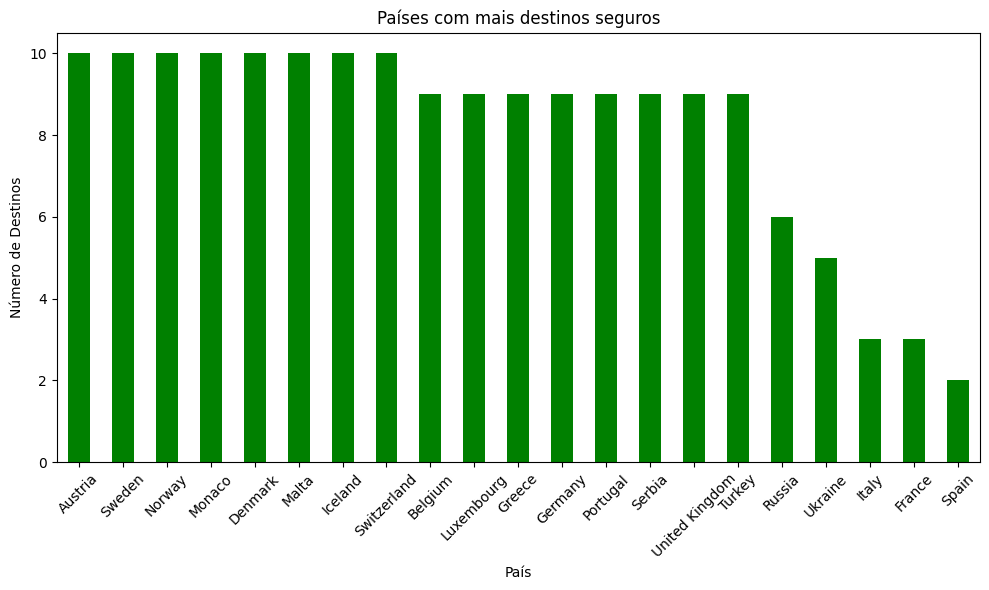

In [7]:
# Função para classificar a segurança com base nas strings
def classify_safety(value):
    if isinstance(value, str):
        if "Generally safe" in value and "but" not in value:
            return "Alta segurança"
        elif "Generally safe, but" in value:
            return "Média segurança"
    return "Baixa segurança"

# Aplicar a função de classificação à coluna 'Safety'
df['Safety Level'] = df['Safety'].apply(classify_safety)

# Exibir os níveis de segurança por país
safety_counts = df['Safety Level'].value_counts()

print("Contagem de Níveis de Segurança:")
print(safety_counts)

# Contar o número de destinos seguros por país
country_safety_counts = df[df['Safety Level'] == "Alta segurança"]['Country'].value_counts()

# Exibir os países com mais destinos altamente seguros
print("\nPaíses com mais destinos altamente seguros:")
print(country_safety_counts)

# Gerar gráfico dos países com mais destinos altamente seguros
plt.figure(figsize=(10, 6))
country_safety_counts.plot(kind='bar', color='green')
plt.title('Países com mais destinos seguros')
plt.xlabel('País')
plt.ylabel('Número de Destinos')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### 3.2. Analise do custo de vida 

Valores únicos na coluna 'Cost of Living':
['Medium-high' 'High' 'Medium' 'Free' 'Extremely high' 'Varies']

Contagem de Destinos por Nível de Custo de Vida:
Cost of Living Level
Medium-high       107
Medium             72
High               15
Free               10
Extremely high      4
Unknown             1
Name: count, dtype: int64

Países com o Maior Custo de Vida:
Country
Switzerland       4
Monaco            4
Iceland           2
France            2
Greece            2
Italy             1
Denmark           1
Germany           1
Norway            1
United Kingdom    1
Name: count, dtype: int64


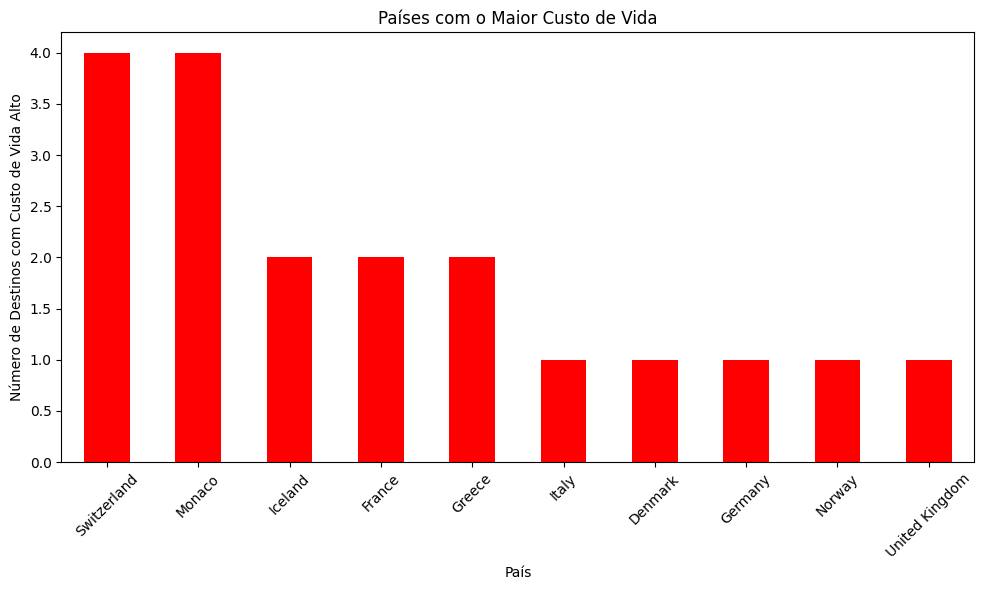

In [8]:
# Verificar os valores únicos na coluna 'Cost of Living' para entender o conteúdo
print("Valores únicos na coluna 'Cost of Living':")
print(df['Cost of Living'].unique())

# Definir uma função para classificar os países pelo custo de vida
def classify_cost_of_living(value):
    if isinstance(value, str):
        if "Extremely high" in value:
            return "Extremely high"
        elif "High" in value:
            return "High"
        elif "Medium-high" in value:
            return "Medium-high"
        elif "Medium" in value:
            return "Medium"
        elif "Free" in value:
            return "Free"
    return "Unknown"

# Aplicar a classificação à coluna 'Cost of Living'
df['Cost of Living Level'] = df['Cost of Living'].apply(classify_cost_of_living)

# Contar o número de destinos por nível de custo de vida
cost_of_living_counts = df['Cost of Living Level'].value_counts()

# Exibir a contagem de destinos por nível de custo de vida
print("\nContagem de Destinos por Nível de Custo de Vida:")
print(cost_of_living_counts)

# Gerar o ranking dos países com o custo de vida mais alto
high_cost_countries = df[df['Cost of Living Level'].isin(["Extremely high", "High"])]['Country'].value_counts()

# Exibir os países com o maior custo de vida
print("\nPaíses com o Maior Custo de Vida:")
print(high_cost_countries)

# Plotar o gráfico dos países com o custo de vida mais alto
plt.figure(figsize=(10, 6))
high_cost_countries.plot(kind='bar', color='red')
plt.title('Países com o Maior Custo de Vida')
plt.xlabel('País')
plt.ylabel('Número de Destinos com Custo de Vida Alto')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## 4. Analise Cultural

### 4.1. Analise de Religiao por Destino


Contagem de Destinos por Religião Predominante:
Majority Religion
Roman Catholic              92
Protestant                  57
Muslim                      10
Greek Orthodox              10
Serbian Orthodox            10
Ukrainian Orthodox          10
Russian Orthodox             9
Christian (Anglican)         8
Christian (Presbyterian)     2
Muslim, Russian Orthodox     1
Name: count, dtype: int64


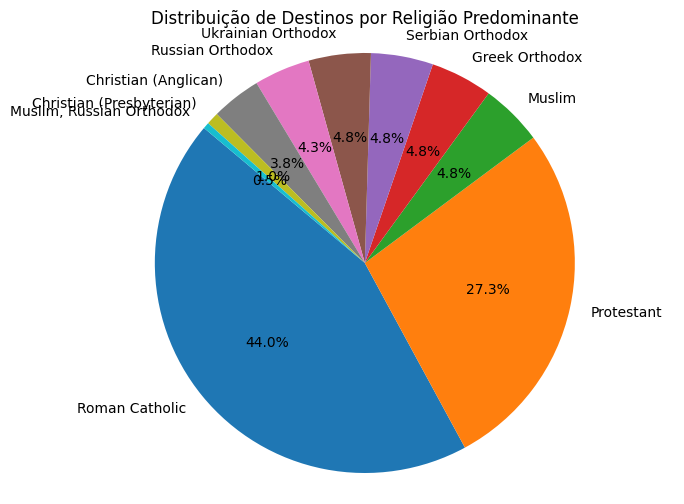

In [9]:

# Contar o número de destinos por religião predominante
religion_counts = df['Majority Religion'].value_counts()

# Exibir a contagem de destinos por religião predominante
print("\nContagem de Destinos por Religião Predominante:")
print(religion_counts)

# Plotar o gráfico de pizza da distribuição de destinos por religião predominante
plt.figure(figsize=(8, 6))
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Destinos por Religião Predominante')
plt.axis('equal')  # Para deixar o gráfico de pizza circular
plt.show()


Top 5 comidas mais famosas:
Borscht: 20 ocorrências
Fish: 20 ocorrências
Seafood: 17 ocorrências
Fondue: 11 ocorrências
Raclette: 11 ocorrências


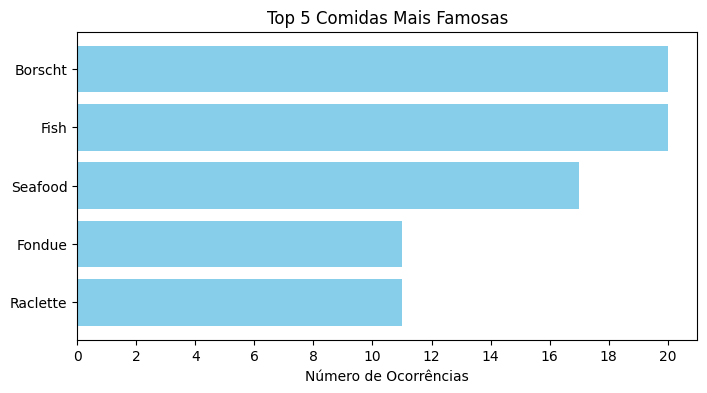

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Remover valores NaN na coluna 'Famous Foods'
famous_foods_clean = df['Famous Foods'].dropna()

# Contador para as comidas
food_counter = Counter()

# Processar cada entrada na coluna 'Famous Foods'
for food in famous_foods_clean:
    # Dividir pela vírgula e limpar espaços
    foods = [f.strip() for f in food.split(',')]
    
    # Contar cada comida individualmente
    for f in foods:
        food_counter[f] += 1

# Obter as 5 comidas mais frequentes
top_5_foods = food_counter.most_common(5)

# Exibir as 5 comidas mais famosas
print("Top 5 comidas mais famosas:")
for food, count in top_5_foods:
    print(f"{food}: {count} ocorrências")

# Preparar os dados para o gráfico
foods = [item[0] for item in top_5_foods]
counts = [item[1] for item in top_5_foods]

plt.figure(figsize=(8, 4))
plt.barh(foods, counts, color='skyblue')
plt.xlabel('Número de Ocorrências')
plt.title('Top 5 Comidas Mais Famosas')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a comida mais famosa fique no topo

# Ajustar os rótulos do eixo x para inteiros de 3 em 3
plt.xticks(range(0, int(max(counts)) + 1, 2))  # Exibir ticks inteiros de 3 em 3

plt.show()


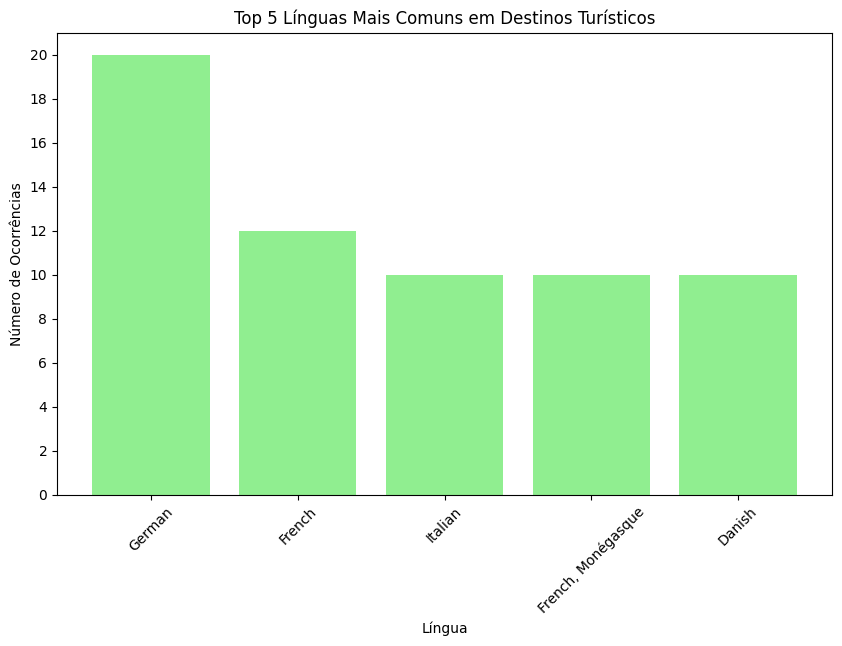

Frequência das Línguas:
Language
German                20
French                12
Italian               10
French, Monégasque    10
Danish                10
Name: count, dtype: int64


In [11]:
# Contar a frequência de cada língua
language_counts = df['Language'].value_counts()

# Obter as 5 línguas mais comuns
top_languages = language_counts.head(5)

# Gerar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_languages.index, top_languages.values, color='lightgreen')
plt.xlabel('Língua')
plt.ylabel('Número de Ocorrências')
plt.title('Top 5 Línguas Mais Comuns em Destinos Turísticos')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Ajustar os rótulos do eixo y para inteiros de 2 em 2
plt.yticks(range(0, int(max(top_languages.values)) + 1, 2))

plt.show()

# Mostrar os dados das línguas
print("Frequência das Línguas:")
print(top_languages)


In [12]:
# Conversão da coluna de Custo de Vida para numérico
df['Cost of Living'] = df['Cost of Living'].replace({'Extremely high': 5, 
                                                      'High': 4, 
                                                      'Medium-high': 3, 
                                                      'Medium': 2, 
                                                      'Free': 1})
# Remover qualquer linha com NaN que possa afetar a análise
df = df.dropna(subset=['Cost of Living', 'Safety'])


In [35]:
# Verificar a estrutura do DataFrame
print("Estrutura do DataFrame:")
print(df.info())

# Verificar os valores únicos na coluna 'Cost of Living'
print("\nValores únicos em 'Cost of Living':")
print(df['Cost of Living'].unique())

# Verificar os valores únicos na coluna 'Safety Score'
print("\nValores únicos em 'Safety Score':")
print(df['Safety Score'].unique())

# Contar valores nulos em ambas as colunas
print("\nContagem de valores nulos:")
print(df[['Cost of Living', 'Safety Score']].isnull().sum())


Estrutura do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 